In [1]:
from pymergence.StochasticMatrix import *
from pymergence.CoarseGraining import *
from pymergence.utils import *
from pymergence.core import *
import numpy as np
import math

In [2]:
m = np.array([[1/13, 1/26, 4/13, 15/26],
              [1, 0, 0, 0],
              [1/math.pi, 1/3, 1-1/math.pi-1/3, 0],
              [0, 1, 0, 0]])

In [3]:
(m*m/4).sum()

np.float64(0.6921739959663484)

In [11]:
# The TPMs to analyse:
network_1block = np.array([
    [1.0, 0, 0, 0, 0],
    [0, 1.0, 0, 0, 0],
    [0, 0, 1.0, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [0, 0, 0, 1/2, 1/2],

])

network_1BigBlock = np.array([
    [1.0, 0, 0, 0, 0],
    [0, 1/4, 1/4, 1/4, 1/4],
    [0, 1/4, 1/4, 1/4, 1/4],
    [0, 1/4, 1/4, 1/4, 1/4],
    [0, 1/4, 1/4, 1/4, 1/4],

])

network_2blocks = np.array([
    [1.0, 0, 0, 0, 0],
    [0, 1/2, 1/2, 0, 0],
    [0, 1/2, 1/2, 0, 0],
    [0, 0, 0, 1/2, 1/2],
    [0, 0, 0, 1/2, 1/2],

])


network_3cycle = np.array([
    [1.0, 0, 0, 0, 0],
    [0, 1/2, 1/2, 0, 0],
    [0, 0, 1/2, 1/2, 0],
    [0, 1/2, 0, 1/2, 0],
    [0, 0, 0, 0, 1.0],

])

network_equal_mixing = np.array([
  [1.0, 0.0, 0.0, 0.0, 0.0], 
  [0.0, 1/3, 1/3, 1/3, 0.0], 
  [0.0, 1/3, 1/3, 0.0, 1/3], 
  [0.0, 1/3, 0.0, 1/3, 1/3], 
  [0.0, 0.0, 1/3, 1/3, 1/3]  
])

networks = {
    "network_1block": network_1block,
    "network_1BigBlock": network_1BigBlock,
    "network_2blocks": network_2blocks,
    "network_3cycle": network_3cycle,
    "network_equal_mixing": network_equal_mixing
}

stochMats = {}
for name, tpm in networks.items():
    stochMats[name] = StochasticMatrix(tpm)

# Coarse-grainings
all_coarse_grainings = generate_all_coarse_grainings(5)

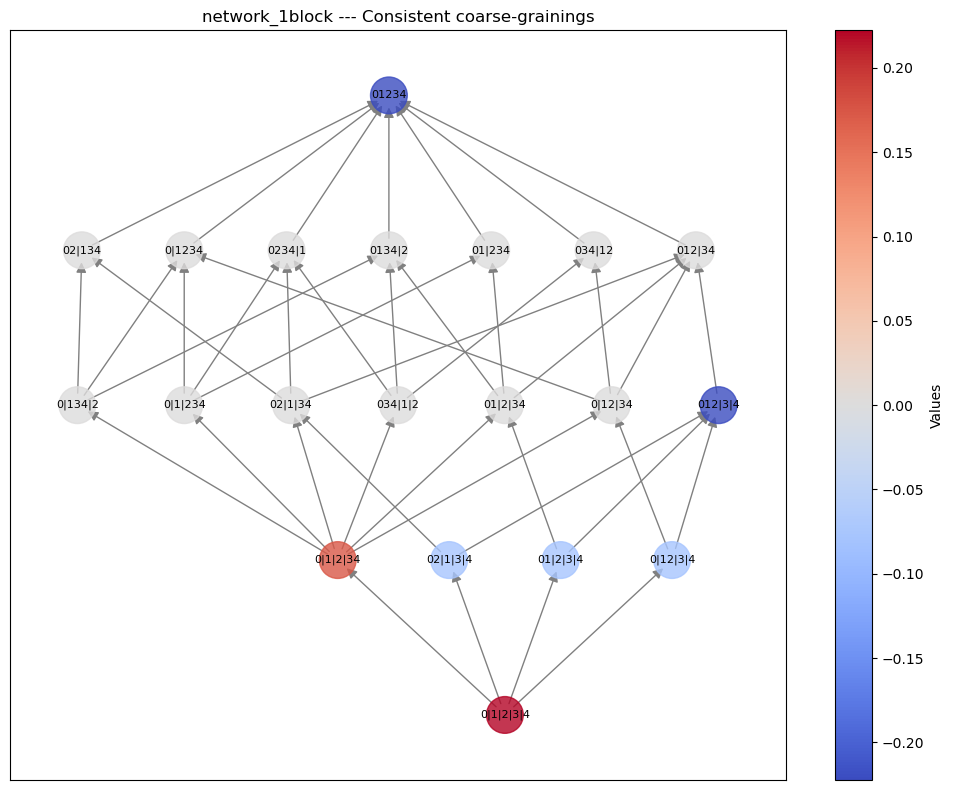

In [12]:
for name, stochMat in stochMats.items():
    consistent_coarse_grainings = stochMat.find_consistent_coarse_grainings(all_coarse_grainings)
    cp_values_cons, _ = calc_CP_along_CGs(stochMat, consistent_coarse_grainings)
    hasse_diagram_cons = refinement_graph(consistent_coarse_grainings)
    delta_cp_dict_cons = delta_CP_ancestors(hasse_diagram_cons, cp_values_cons, allAncestors=True)
    draw_refinement_graph(hasse_diagram_cons, delta_cp_dict_cons, title=f"{name} --- Consistent coarse-grainings")
    break

In [6]:
path_vals = greedy_path_on_lattice(hasse_diagram_cons, cp_values_cons)
path_vals

[('0|1|2|3|4', np.float64(0.8277293767705656)),
 ('0|1|2|34', np.float64(0.9999999999999253)),
 ('0|12|34', np.float64(0.9999999999999372)),
 ('012|34', np.float64(0.9999999999999502)),
 ('01234', 0.0)]

In [7]:
M = StochasticMatrix(np.array([
    [1/3, 1/3, 1/3, 0],
    [1/3, 1/3, 1/3, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
]))

In [8]:
n = 4
intervention_distribution = np.ones(n) / n
print(M.determinism(intervention_distribution))
print(M.degeneracy(intervention_distribution))

0.6037593748196612
0.10375937481971098


In [9]:
print(1 - np.log2(3)/4)
print(1 - 1/4 * (np.log2(6) + np.log2(2)))

0.603759374819711
0.10375937481971098


In [10]:
print()